# Word2Vec 소개

## 유사한 단어들을 비슷한 방향과 힘의 벡터를 갖도록 변환하여 사용하는 방법
- 1안) 자신의 문장으로 단어별 벡터를 생성한다.
- 2안) 미리 트레이닝된 모델의 벡터를 이용한다.
- 3안) 자신 단어별 벡터와 미리 트레이닝 모델의 벡터를 교차하여 이용한다.<br>
  (보유한 단어사전은 바뀌지 않고 벡터와 교차하여 업데이트된다.)

### 1안

In [11]:
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# 단어와 2차원 X축의 값, Y축의 값을 입력받아 2차원 그래프를 그림
def plot_2d_graph(vocabs, xs, ys):
    plt.figure(figsize=(8, 6))
    plt.scatter(xs, ys, marker='o')
    for i, v in enumerate(vocabs):
        plt.annotate(v, xy=(xs[i], ys[i]))

In [13]:
sentences = [
              ['this', 'is', 'a', 'good', 'product'],
              ['it', 'is', 'a', 'excellent', 'product'],
              ['it', 'is', 'a', 'bad', 'product'],
              ['that', 'is', 'the', 'worst', 'product']
            ]

In [14]:
# 문장을 이용하여 단어와 벡터를 생성
model = Word2Vec(sentences, size=300, window=3, min_count=1, workers=1)

In [15]:
# 단어 백터 구하기
word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

In [16]:
vocabs

dict_keys(['this', 'is', 'a', 'good', 'product', 'it', 'excellent', 'bad', 'that', 'the', 'worst'])

In [17]:
word_vectors_list

[array([ 1.43659522e-03, -4.82270378e-04,  6.20057224e-04,  5.03227755e-04,
        -4.63808043e-04, -8.60300555e-04,  2.79295171e-04,  1.64362206e-03,
         1.10514951e-03, -2.08475918e-04,  5.44013630e-04, -1.29627541e-03,
        -1.46428868e-03,  1.25496276e-03, -8.12237675e-04,  2.25337280e-04,
        -1.38102705e-03, -1.64565875e-03, -1.25995302e-03,  9.35906719e-04,
        -8.35007639e-04, -9.17845173e-04,  1.22051360e-03, -1.24178710e-03,
        -1.46864890e-03, -1.27036159e-03, -1.12835609e-04,  1.27933384e-03,
         1.05602189e-03, -7.79326889e-04, -9.82986065e-04, -7.03765312e-04,
         1.47023064e-04, -3.83801991e-04,  4.07951520e-05, -6.60369871e-04,
         1.36126007e-03, -1.32744340e-03,  1.17214036e-03, -1.62513484e-03,
         1.52379950e-03,  3.81124031e-04,  1.44515594e-03, -1.13874348e-03,
         2.66031013e-04,  4.69085906e-04,  8.39941902e-04, -1.79494193e-04,
        -9.92368325e-04, -1.28328952e-03,  1.45012629e-03, -1.56228885e-03,
         1.0

In [18]:
# 단어간 유사도 확인
word_vectors.similarity(w1='it', w2='this')

-0.11474116

In [19]:
# 그래프 그리기
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:, 0]
ys = xys[:, 1]

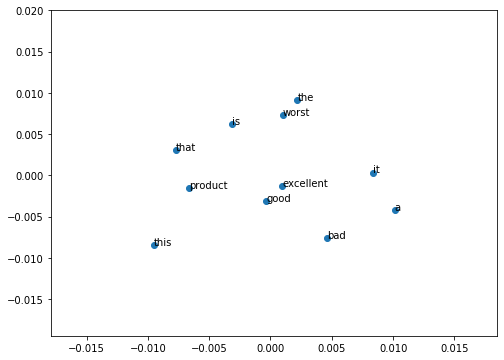

In [20]:
plot_2d_graph(vocabs, xs, ys)

### 3안) 미리 학습된 모델과 병합

In [21]:
# 다운로드(https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM&export=download)
filename = 'data/01_GoogleNews-vectors-negative300.bin'
model.intersect_word2vec_format(fname=filename, binary=True)

In [22]:
# 단어 벡터 구하기
word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

In [23]:
len(word_vectors_list)

11

In [24]:
# 단어간 유사도 확인
word_vectors.similarity(w1='it', w2='this')

0.5386158

In [25]:
# 그래프 그리기
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:, 0]
ys = xys[:, 1]

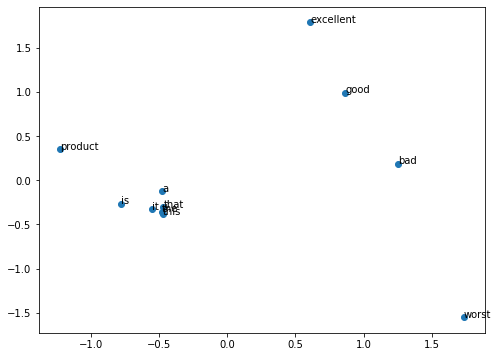

In [26]:
plot_2d_graph(vocabs, xs, ys)

#### 최종 모델 저장

In [27]:
model.save('model/01_word2vec.model')

#### 저장한 모델을 읽어서 사용

In [28]:
model = Word2Vec.load('model/01_word2vec.model')